### Utilizando boto3 para processamento de Linguagem Natural 
Neste tutorial iremos utilizar ferramentas de processamento de audio e texto e Linguagem Natural para analisar dados provenientes de vídeos do Youtube. Os arquivos serão baixados utilizando uma ferramenta de linha de comando chamada [Youtube-DL](https://github.com/ytdl-org/youtube-dl/blob/master/README.md#readme), e iremos utilizar os serviços de NLP oferecidos pela AWS, accessados pela biblioteca [boto3](https://boto3.amazonaws.com/v1/documentation/api/latest/index.html).

In [2]:
# Bibliotecas que serão utilizadas ao longo do tutorial
from __future__ import print_function
import boto3
import os
import time
import pandas as pd
import matplotlib as plt
import logging
from botocore.exceptions import ClientError

%matplotlib inline

#### 1) Baixando arquivos de vídeo do Youtube
O primeiro passo em nosso tutorial é baixar os arquivos de áudio a partir de links de videos específicos selecionados. Para isso usaremos a ferramenta Youtube-DL que pode ser instalada através do ```pip```.

```sudo pip install youtube-dl```<br>
ou<br>
```conda install -c conda-forge youtube-dl```


Para baixar um vídeo qualquer: 

```youtube-dl <video_url>```

Como iremos trabalhar apenas com áudio, podemos usar o parâmetro ```-x``` e ```--audio-format "m4u"``` para baixar somente a parte de áudio do vídeo do Youtube. 

```youtube-dl -x --audio-format "m4a" <video_url>```

#### Lista de Vídeos de selecionados
Serão analisados 5 discursos gravados em vídeo e disponibilizados publicamente no Youtube. Segue a descrição de cada um deles:

A) ["We shall never surrender" de Winston Churchill](https://www.youtube.com/watch?v=s_LncVnecLA)
Esse discurso histórico foi proferido pelo Primeiro Ministro Britânico Winston Churchill no dia 4 junho de 1940. Nele, o estadista aborda a situação crítica no qual se encontrava os aliados frente a invasão nazista na França e da batalha de Dunkirk.

B) ["40o Aniversário de Invasão da Normandia", Ronald Reagan"](https://www.youtube.com/watch?v=1Leb7ynduCU)
No dia 6 de junho de 1984 Ronald Reagan, presidente americano em exercício na época, discursou na Normandia (França) em homenagem aos 40 anos do Dia-D. O discurso homenageou de forma marcante os soldados que morreram na batalha ao longo da costa norte francesa, e que de certa forma definiram o destino da Segunda Guerra, e consequentemente, da história moderna.

C) 



In [3]:
ls

Amazon founder Jeff Bezos delivers speech at Princeton University - Engsub-uvzkujQFlxQ.mp3
conda_env_nlp_aws.yaml
conda_env_pytorch.yaml
I Have a Dream speech by Martin Luther King .Jr HD (subtitled) (Remastered)-vP4iY1TtS3s.mp3
Neil Gaiman 2012 Commencement Speech 'Make Good Art'-plWexCID-kA.mp3
NLP_usando_AWS.ipynb
Normandy Speech - President Reagan's Address Commemorating 40th Anniversary of Normandy_D-Day  6_6_84-1Leb7ynduCU.mp3
WE SHALL NEVER SURRENDER speech by Winston Churchill (We Shall Fight on the Beaches)-s_LncVnecLA.mp3


In [4]:
dict_urls_youtube = {
    'churchill': 'https://www.youtube.com/watch?v=s_LncVnecLA',
    'reagan': 'https://www.youtube.com/watch?v=1Leb7ynduCU',
    'luther_king': 'https://www.youtube.com/watch?v=vP4iY1TtS3s&t=42s',
    'bezos': 'https://www.youtube.com/watch?v=uvzkujQFlxQ',
    'gaiman': 'https://www.youtube.com/watch?v=plWexCID-kA'}

In [4]:
for url in list(dict_urls_youtube.values()):
    os.system(f'youtube-dl -x --audio-format "mp3" {url}')

In [5]:
df_audio = pd.DataFrame.from_dict(dict_urls_youtube, orient='index', columns=['youtube_urls'])

In [6]:
ls

Amazon founder Jeff Bezos delivers speech at Princeton University - Engsub-uvzkujQFlxQ.mp3
conda_env_nlp_aws.yaml
conda_env_pytorch.yaml
I Have a Dream speech by Martin Luther King .Jr HD (subtitled) (Remastered)-vP4iY1TtS3s.mp3
Neil Gaiman 2012 Commencement Speech 'Make Good Art'-plWexCID-kA.mp3
NLP_usando_AWS.ipynb
Normandy Speech - President Reagan's Address Commemorating 40th Anniversary of Normandy_D-Day  6_6_84-1Leb7ynduCU.mp3
WE SHALL NEVER SURRENDER speech by Winston Churchill (We Shall Fight on the Beaches)-s_LncVnecLA.mp3


In [7]:
df_audio

,youtube_urls
churchill,https://www.youtube.com/watch?v=s_LncVnecLA
reagan,https://www.youtube.com/watch?v=1Leb7ynduCU
luther_king,https://www.youtube.com/watch?v=vP4iY1TtS3s&t=42s
bezos,https://www.youtube.com/watch?v=uvzkujQFlxQ
gaiman,https://www.youtube.com/watch?v=plWexCID-kA


In [8]:
# Atribuindo nome do arquivo baixado a cada autor do discurso
for audio_file in os.listdir('.'):
    print(audio_file)
    if 'churchill' in audio_file.lower():
        df_audio.at['churchill','filename'] = audio_file
    elif 'reagan' in audio_file.lower():
        df_audio.at['reagan', 'filename'] = audio_file
    elif 'king' in audio_file.lower():
        df_audio.at['luther_king', 'filename'] = audio_file
    elif 'bezos' in audio_file.lower():
        df_audio.at['bezos', 'filename'] = audio_file
    elif 'gaiman' in audio_file.lower():
        df_audio.at['gaiman', 'filename'] = audio_file

I Have a Dream speech by Martin Luther King .Jr HD (subtitled) (Remastered)-vP4iY1TtS3s.mp3
.git
Normandy Speech - President Reagan's Address Commemorating 40th Anniversary of Normandy_D-Day  6_6_84-1Leb7ynduCU.mp3
WE SHALL NEVER SURRENDER speech by Winston Churchill (We Shall Fight on the Beaches)-s_LncVnecLA.mp3
NLP_usando_AWS.ipynb
conda_env_pytorch.yaml
.ipynb_checkpoints
Amazon founder Jeff Bezos delivers speech at Princeton University - Engsub-uvzkujQFlxQ.mp3
.gitignore
conda_env_nlp_aws.yaml
Neil Gaiman 2012 Commencement Speech 'Make Good Art'-plWexCID-kA.mp3


In [9]:
df_audio

,youtube_urls,filename
churchill,https://www.youtube.com/watch?v=s_LncVnecLA,WE SHALL NEVER SURRENDER speech by Winston Chu...
reagan,https://www.youtube.com/watch?v=1Leb7ynduCU,Normandy Speech - President Reagan's Address C...
luther_king,https://www.youtube.com/watch?v=vP4iY1TtS3s&t=42s,I Have a Dream speech by Martin Luther King .J...
bezos,https://www.youtube.com/watch?v=uvzkujQFlxQ,Amazon founder Jeff Bezos delivers speech at P...
gaiman,https://www.youtube.com/watch?v=plWexCID-kA,Neil Gaiman 2012 Commencement Speech 'Make Goo...


Configurando o AWS CLI pelo terminal
Para trabalhar com o boto3, você deve instalar o ```awscli```
```
$ pip install awscli --upgrade --user
```

E em seguida configurá-lo com as suas credenciais da AWS

```
aws configure
```

E definir os seguintes valores:

```
AWS Access Key ID [****************DNYA]: 
AWS Secret Access Key [****************oEG/]: 
Default region name [sa-east-1]: 
Default output format [json]:
```






In [ ]:
# Definir a AZ respectiva da AWS
boto3.setup_default_session(region_name='us-east-1')

In [26]:
#Subindo os arquivos para o S3
# Criar um cliente S3
s3 = boto3.client('s3')

# Buscar lista de buckets no S3
response = s3.list_buckets()

# Organizar a resposta em uma lista
buckets = [bucket['Name'] for bucket in response['Buckets']]

print("Bucket List: %s" % buckets)

Bucket List: ['aws-deepracer-35d06d75-1bdf-410f-8544-4675a95e89e2', 'aws-sam-cli-gsg', 'elasticbeanstalk-us-east-1-089951219780', 'grupy-nlp-aws', 'grupy-nlp-speeches122222222', 'little-thomas-assets', 'medium-lambda-tutorial-bucket', 'regis-media', 'stackery-assetsbucket-p8b8xq12o1re', 'udacity-secure-and-pivate-ai-project', 'vision-pmp']


In [42]:
# Criando um novo bucket para subir os arquivos
bucket_name = 'grupy-nlp-aws'
try:
    s3 = boto3.client('s3')
    s3.create_bucket(Bucket=bucket_name)
except:
    print('Bucket com o mesmo nome já criado.')

In [23]:
df_audio

,youtube_urls,filename
churchill,https://www.youtube.com/watch?v=s_LncVnecLA,WE SHALL NEVER SURRENDER speech by Winston Chu...
reagan,https://www.youtube.com/watch?v=1Leb7ynduCU,Normandy Speech - President Reagan's Address C...
luther_king,https://www.youtube.com/watch?v=vP4iY1TtS3s&t=42s,I Have a Dream speech by Martin Luther King .J...
bezos,https://www.youtube.com/watch?v=uvzkujQFlxQ,Amazon founder Jeff Bezos delivers speech at P...
gaiman,https://www.youtube.com/watch?v=plWexCID-kA,Neil Gaiman 2012 Commencement Speech 'Make Goo...


In [27]:
# Subindo os arquivos de audio para o bucket s3 criado
for audio_file in df_audio.filename.values:
    print(audio_file)
    s3.upload_file(audio_file, bucket_name, audio_file)
    boto3.resource('s3').ObjectAcl(bucket_name,audio_file).put(ACL='public-read')

WE SHALL NEVER SURRENDER speech by Winston Churchill (We Shall Fight on the Beaches)-s_LncVnecLA.mp3
Normandy Speech - President Reagan's Address Commemorating 40th Anniversary of Normandy_D-Day  6_6_84-1Leb7ynduCU.mp3
I Have a Dream speech by Martin Luther King .Jr HD (subtitled) (Remastered)-vP4iY1TtS3s.mp3
Amazon founder Jeff Bezos delivers speech at Princeton University - Engsub-uvzkujQFlxQ.mp3
Neil Gaiman 2012 Commencement Speech 'Make Good Art'-plWexCID-kA.mp3


In [29]:
# Definir a url de cada arquivo no S3 no df_audio
s3_resource = boto3.resource('s3')
first_bucket = s3_resource.Bucket(name=bucket_name)
for obj in first_bucket.objects.all():
    url = '{}/{}/{}'.format(s3.meta.endpoint_url, 'grupy-nlp-speeches', obj.key.replace(' ', '+'))
    print(url)
    if 'churchill' in url.lower():
        df_audio.at['churchill','url'] = url
    elif 'reagan' in url.lower():
        df_audio.at['reagan', 'url'] = url
    elif 'king' in url.lower():
        df_audio.at['luther_king', 'url'] = url
    elif 'bezos' in url.lower():
        df_audio.at['bezos', 'url'] = url
    elif 'gaiman' in url.lower():
        df_audio.at['gaiman', 'url'] = url

https://s3.amazonaws.com/grupy-nlp-speeches/Amazon+founder+Jeff+Bezos+delivers+speech+at+Princeton+University+-+Engsub-uvzkujQFlxQ.mp3
https://s3.amazonaws.com/grupy-nlp-speeches/I+Have+a+Dream+speech+by+Martin+Luther+King+.Jr+HD+(subtitled)+(Remastered)-vP4iY1TtS3s.mp3
https://s3.amazonaws.com/grupy-nlp-speeches/Neil+Gaiman+2012+Commencement+Speech+'Make+Good+Art'-plWexCID-kA.mp3
https://s3.amazonaws.com/grupy-nlp-speeches/Normandy+Speech+-+President+Reagan's+Address+Commemorating+40th+Anniversary+of+Normandy_D-Day++6_6_84-1Leb7ynduCU.mp3
https://s3.amazonaws.com/grupy-nlp-speeches/WE+SHALL+NEVER+SURRENDER+speech+by+Winston+Churchill+(We+Shall+Fight+on+the+Beaches)-s_LncVnecLA.mp3


In [32]:
df_audio

,youtube_urls,filename,url
churchill,https://www.youtube.com/watch?v=s_LncVnecLA,WE SHALL NEVER SURRENDER speech by Winston Chu...,https://s3.amazonaws.com/grupy-nlp-speeches/WE...
reagan,https://www.youtube.com/watch?v=1Leb7ynduCU,Normandy Speech - President Reagan's Address C...,https://s3.amazonaws.com/grupy-nlp-speeches/No...
luther_king,https://www.youtube.com/watch?v=vP4iY1TtS3s&t=42s,I Have a Dream speech by Martin Luther King .J...,https://s3.amazonaws.com/grupy-nlp-speeches/I+...
bezos,https://www.youtube.com/watch?v=uvzkujQFlxQ,Amazon founder Jeff Bezos delivers speech at P...,https://s3.amazonaws.com/grupy-nlp-speeches/Am...
gaiman,https://www.youtube.com/watch?v=plWexCID-kA,Neil Gaiman 2012 Commencement Speech 'Make Goo...,https://s3.amazonaws.com/grupy-nlp-speeches/Ne...


In [45]:
s3 = boto3.client('s3')
url = '{}/{}/{}'.format(s3.meta.endpoint_url, 'grupy-nlp-speeches', "Neil Gaiman 2012 Commencement Speech 'Make Good Art'-plWexCID-kA.mp3")

In [34]:
url = df_audio.at['luther_king', 'url']
url

'https://s3.amazonaws.com/grupy-nlp-speeches/I+Have+a+Dream+speech+by+Martin+Luther+King+.Jr+HD+(subtitled)+(Remastered)-vP4iY1TtS3s.mp3'

In [47]:
bucket_location = boto3.client('s3').get_bucket_location(Bucket=bucket_name)
object_url = "https://s3-{0}.amazonaws.com/{1}/{2}".format(
    bucket_location['LocationConstraint'],
    'grupy-nlp-speeches',
    'https://grupy-nlp-speeches.s3-sa-east-1.amazonaws.com/I+Have+a+Dream+speech+by+Martin+Luther+King+.Jr+HD+(subtitled)+(Remastered)-vP4iY1TtS3s.mp3')

In [35]:
for object in s3.objects.all():
    print(object)

AttributeError: 'S3' object has no attribute 'objects'

In [51]:
df_audio.at['luther_king', 'url']

'https://s3.amazonaws.com/grupy-nlp-speeches/I+Have+a+Dream+speech+by+Martin+Luther+King+.Jr+HD+(subtitled)+(Remastered)-vP4iY1TtS3s.mp3'

In [ ]:
https://grupy-nlp-aws.s3.amazonaws.com/I+Have+a+Dream+speech+by+Martin+Luther+King+.Jr+HD+(subtitled)+(Remastered)-vP4iY1TtS3s.mp3


In [40]:
job_uri = 'https://grupy-nlp-aws.s3.amazonaws.com/I+Have+a+Dream+speech+by+Martin+Luther+King+.Jr+HD+(subtitled)+(Remastered)-vP4iY1TtS3s.mp3'

In [43]:
from __future__ import print_function
import time
import boto3
transcribe = boto3.client('transcribe')
job_name = "teste_boto3_transcribe_martinluther_23august2019"
#job_uri = df_audio.at['luther_king', 'url']
transcribe.start_transcription_job(
    TranscriptionJobName=job_name,
    Media={'MediaFileUri': job_uri},
    MediaFormat='mp3',
    LanguageCode='en-US',
    OutputBucketName=bucket_name   
    
)
while True:
    status = transcribe.get_transcription_job(TranscriptionJobName=job_name)
    if status['TranscriptionJob']['TranscriptionJobStatus'] in ['COMPLETED', 'FAILED']:
        break
    print("Not ready yet...")
    time.sleep(20)
print(status)

Not ready yet...
Not ready yet...
Not ready yet...
Not ready yet...
Not ready yet...
Not ready yet...
Not ready yet...
Not ready yet...
Not ready yet...
Not ready yet...
{'TranscriptionJob': {'TranscriptionJobName': 'teste_boto3_transcribe_martinluther_23august2019', 'TranscriptionJobStatus': 'COMPLETED', 'LanguageCode': 'en-US', 'MediaSampleRateHertz': 44100, 'MediaFormat': 'mp3', 'Media': {'MediaFileUri': 'https://grupy-nlp-aws.s3.amazonaws.com/I+Have+a+Dream+speech+by+Martin+Luther+King+.Jr+HD+(subtitled)+(Remastered)-vP4iY1TtS3s.mp3'}, 'Transcript': {'TranscriptFileUri': 'https://s3.amazonaws.com/grupy-nlp-aws/teste_boto3_transcribe_martinluther_23august2019.json'}, 'CreationTime': datetime.datetime(2019, 8, 23, 14, 46, 27, 797000, tzinfo=tzlocal()), 'CompletionTime': datetime.datetime(2019, 8, 23, 14, 49, 34, 57000, tzinfo=tzlocal()), 'Settings': {'ChannelIdentification': False}}, 'ResponseMetadata': {'RequestId': '9110b94b-bd75-490e-a9f2-aba7f140f3b9', 'HTTPStatusCode': 200, 'HTT

In [ ]:
## Para 

In [40]:
status

{'TranscriptionJob': {'TranscriptionJobName': 'teste_boto3_transcribe_martinluther_22august2019',
  'TranscriptionJobStatus': 'COMPLETED',
  'LanguageCode': 'en-US',
  'MediaSampleRateHertz': 44100,
  'MediaFormat': 'mp3',
  'Media': {'MediaFileUri': 'https://grupy-nlp-aws.s3.amazonaws.com/I+Have+a+Dream+speech+by+Martin+Luther+King+.Jr+HD+(subtitled)+(Remastered)-vP4iY1TtS3s.mp3'},
  'Transcript': {'TranscriptFileUri': 'https://s3.amazonaws.com/aws-transcribe-us-east-1-prod/089951219780/teste_boto3_transcribe_martinluther_22august2019/b5506766-6753-4192-92a8-d5825a5e1234/asrOutput.json?X-Amz-Security-Token=AgoJb3JpZ2luX2VjEEUaCXVzLWVhc3QtMSJHMEUCIAUE9odBIS4X%2Faiyi2SiVMzKFA5f%2B6J1OTavR%2FKUlfzvAiEA6BX7JgIzmz99RuDA9G%2FwrpjaA63UoZTp%2BabAZbmatlUq4wMI3f%2F%2F%2F%2F%2F%2F%2F%2F%2F%2FARABGgwyNzY2NTY0MzMxNTMiDJAsvJQe3KLTjrkVWiq3A8TZeQhHqkksysRzN6wC%2F9gn5xVyF%2FCqOOZwgIU4wjgoiyFTLshl0R9AMfoXa%2Bntfr8tqT%2BGH8iqhLxFQR0tvX8LGryzRgC1tsizhHMKyY78vj8EYdGZAm5UIzbXdMC7QWDiS8S8tX7XChfBGHb5rcQDwvZ

In [44]:
uri = status.get('TranscriptionJob').get('Transcript').get('TranscriptFileUri')

In [45]:
uri

'https://s3.amazonaws.com/aws-transcribe-us-east-1-prod/089951219780/teste_boto3_transcribe_martinluther_22august2019/b5506766-6753-4192-92a8-d5825a5e1234/asrOutput.json?X-Amz-Security-Token=AgoJb3JpZ2luX2VjEEUaCXVzLWVhc3QtMSJHMEUCIAUE9odBIS4X%2Faiyi2SiVMzKFA5f%2B6J1OTavR%2FKUlfzvAiEA6BX7JgIzmz99RuDA9G%2FwrpjaA63UoZTp%2BabAZbmatlUq4wMI3f%2F%2F%2F%2F%2F%2F%2F%2F%2F%2FARABGgwyNzY2NTY0MzMxNTMiDJAsvJQe3KLTjrkVWiq3A8TZeQhHqkksysRzN6wC%2F9gn5xVyF%2FCqOOZwgIU4wjgoiyFTLshl0R9AMfoXa%2Bntfr8tqT%2BGH8iqhLxFQR0tvX8LGryzRgC1tsizhHMKyY78vj8EYdGZAm5UIzbXdMC7QWDiS8S8tX7XChfBGHb5rcQDwvZ6ZuQqxI0DljA2ZQIFwyhpv35W1%2BZ%2B2c%2B1aQNTmM2WV%2BQDUncKBjy9K0uXC4tRrk5KLGpxwp9OwY8phJMEbb8mJIZOh3mtYQgMrcPJQxowlde1q6KFExwnYHrJ1BgbQOMUwEfhFSZQx0o4L6jCenqmzCNTXN81%2F29WixJHVQvM9VcteJU%2BKY8diF0KQTUVsbMOZ4mT17QCJVYGeiot4XiuN3%2B4qGJVbb0rIv4Qv6WS8w%2B3n80Gi2uFfitjzLNrNjxgaSFWPNuE35K1OwkuhK2drPwzbdKoBGSekKZaZLJR5uYxF8W5QzzpfgzfFx4F8udlFYYWDWahLpcpqg7X4IZ%2FzR5UdCmZH1JnndWPoyiKTu1kHG06IHXhTgcuZ4CxV%2FzRlp%2FtlSzO0E1o2oEAa

In [39]:
status.get('ResponseMetadata')

{'RequestId': '3a10c3dc-e8f9-4ece-ab53-8bbcb8b3da6f',
 'HTTPStatusCode': 200,
 'HTTPHeaders': {'content-type': 'application/x-amz-json-1.1',
  'date': 'Thu, 22 Aug 2019 21:02:52 GMT',
  'x-amzn-requestid': '3a10c3dc-e8f9-4ece-ab53-8bbcb8b3da6f',
  'content-length': '2078',
  'connection': 'keep-alive'},
 'RetryAttempts': 0}

In [17]:
import json
import requests

In [26]:
response = requests.get(uri)

In [27]:
response.text

'<?xml version="1.0" encoding="UTF-8"?>\n<Error><Code>AccessDenied</Code><Message>Request has expired</Message><X-Amz-Expires>900</X-Amz-Expires><Expires>2019-08-23T17:25:07Z</Expires><ServerTime>2019-08-23T17:25:33Z</ServerTime><RequestId>23A19720757B04AF</RequestId><HostId>Dtfuxf49ceKAOxyIknn0NtrUeUDYABZoQgwhROX137Ca2esdJUBddLreOhZaHfvjJuRVL6jgf8w=</HostId></Error>'

In [28]:
todos = json.loads(response.text)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [ ]:
todos

In [44]:
transcribe_client = boto3.client('transcribe')
response = transcribe_client.list_transcription_jobs(
    Status='COMPLETED')
response

{'Status': 'COMPLETED',
 'TranscriptionJobSummaries': [{'TranscriptionJobName': 'teste_boto3_transcribe_martinluther_23august2019',
   'CreationTime': datetime.datetime(2019, 8, 23, 14, 46, 27, 797000, tzinfo=tzlocal()),
   'CompletionTime': datetime.datetime(2019, 8, 23, 14, 49, 34, 57000, tzinfo=tzlocal()),
   'LanguageCode': 'en-US',
   'TranscriptionJobStatus': 'COMPLETED',
   'OutputLocationType': 'CUSTOMER_BUCKET'},
  {'TranscriptionJobName': 'teste_boto3_transcribe_martinluther_22august2019',
   'CreationTime': datetime.datetime(2019, 8, 22, 17, 59, 43, 915000, tzinfo=tzlocal()),
   'CompletionTime': datetime.datetime(2019, 8, 22, 18, 2, 50, 305000, tzinfo=tzlocal()),
   'LanguageCode': 'en-US',
   'TranscriptionJobStatus': 'COMPLETED',
   'OutputLocationType': 'SERVICE_BUCKET'}],
 'ResponseMetadata': {'RequestId': '016bf6fb-e263-4bab-a714-140d8094f844',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'content-type': 'application/x-amz-json-1.1',
   'date': 'Fri, 23 Aug 2019 18:17:23

In [45]:
transcription_job_MLK = transcribe_client.get_transcription_job(
TranscriptionJobName='teste_boto3_transcribe_martinluther_23august2019')

In [46]:
transcription_job_MLK

{'TranscriptionJob': {'TranscriptionJobName': 'teste_boto3_transcribe_martinluther_23august2019',
  'TranscriptionJobStatus': 'COMPLETED',
  'LanguageCode': 'en-US',
  'MediaSampleRateHertz': 44100,
  'MediaFormat': 'mp3',
  'Media': {'MediaFileUri': 'https://grupy-nlp-aws.s3.amazonaws.com/I+Have+a+Dream+speech+by+Martin+Luther+King+.Jr+HD+(subtitled)+(Remastered)-vP4iY1TtS3s.mp3'},
  'Transcript': {'TranscriptFileUri': 'https://s3.amazonaws.com/grupy-nlp-aws/teste_boto3_transcribe_martinluther_23august2019.json'},
  'CreationTime': datetime.datetime(2019, 8, 23, 14, 46, 27, 797000, tzinfo=tzlocal()),
  'CompletionTime': datetime.datetime(2019, 8, 23, 14, 49, 34, 57000, tzinfo=tzlocal()),
  'Settings': {'ChannelIdentification': False}},
 'ResponseMetadata': {'RequestId': '75eeb4ab-c27d-413f-93e0-2070ebc346df',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'content-type': 'application/x-amz-json-1.1',
   'date': 'Fri, 23 Aug 2019 18:18:02 GMT',
   'x-amzn-requestid': '75eeb4ab-c27d-413f-93

In [47]:
uri = transcription_job_MLK.get('TranscriptionJob').get('Transcript').get('TranscriptFileUri')

In [48]:
uri

'https://s3.amazonaws.com/grupy-nlp-aws/teste_boto3_transcribe_martinluther_23august2019.json'

In [23]:
transcription_job_MLK.get('TranscriptionJob')

{'TranscriptionJobName': 'teste_boto3_transcribe_martinluther_22august2019',
 'TranscriptionJobStatus': 'COMPLETED',
 'LanguageCode': 'en-US',
 'MediaSampleRateHertz': 44100,
 'MediaFormat': 'mp3',
 'Media': {'MediaFileUri': 'https://grupy-nlp-aws.s3.amazonaws.com/I+Have+a+Dream+speech+by+Martin+Luther+King+.Jr+HD+(subtitled)+(Remastered)-vP4iY1TtS3s.mp3'},
 'Transcript': {'TranscriptFileUri': 'https://s3.amazonaws.com/aws-transcribe-us-east-1-prod/089951219780/teste_boto3_transcribe_martinluther_22august2019/b5506766-6753-4192-92a8-d5825a5e1234/asrOutput.json?X-Amz-Security-Token=AgoJb3JpZ2luX2VjEFkaCXVzLWVhc3QtMSJHMEUCIQCaIpcaDtAT2tA0XHKC%2F2aTy4H3oVKxv6YoyENjn0ukYAIgJ9upHoAJCM3SbEa0FnapHd6qCLCZdZkkleT8B0Np3Acq4wMI8f%2F%2F%2F%2F%2F%2F%2F%2F%2F%2FARABGgwyNzY2NTY0MzMxNTMiDCJdnA2NkGM82fORuiq3A9IWzCHIZsHAj3IEqnnsWW%2F27I1j8bi2dUochoL5gPc5beMZJR9EdKSuNMvaVHOgdbEnc2MguAQ950ydTdfLXWXIf%2FPy23a4HorsVwKT8MCPpF1nklECZUldxHo0Po%2F9YwsTbLJKwt%2Fh1PchoaKBTXLtu3tnlj3wtv5VgjFUlcO%2F%2FO%2BxCPkB0L5x

In [32]:
job_result = transcription_job_MLK['TranscriptionJob']['Transcript']['TranscriptFileUri']
        

In [54]:
import boto3
import json

s3 = boto3.resource('s3')
BUCKET='grupy-nlp-aws'
KEY='teste_boto3_transcribe_martinluther_23august2019.json'

content_object = s3.Object(BUCKET, KEY)
file_content = content_object.get()['Body'].read().decode('utf-8')
json_content = json.loads(file_content)

In [57]:
transcript = json_content.get('results').get('transcripts')[0].get('transcript')

In [58]:
transcript

"I have the pleasure to present to you, not the Martin Luther King. I'm happy to John with you today in what will go down in history as the greatest demonstration for freedom in the history of our nation. Five score years ago, A great American in whose symbolic shadow we stand today signed the Emancipation Proclamation. This momentous decree came as a great beacon, light of hope to millions of Negro slave who had been seared in the flames of withering injustice. It came as a joyous daybreak to end the long night of their captivity. But 100 years later, the Negro still is not free. 100 years later, the life of the Negro is still sadly crippled by the man Nichols of segregation and the chains of discrimination. 100 years later, Negro lives on a lonely island of poverty. I have a green, but one day this nation will rise up, live out the true meaning of its creed. We hold these truths to be self evident. That all men are created well may be able to sit down together at the table of probabl

In [52]:
client_s3 = boto3.client('s3')
responseFromS3 = client_s3.get_object(Bucket='grupy-nlp-aws', Key='teste_boto3_transcribe_martinluther_23august2019.json')
file_content = responseFromS3.get()['Body'].read().decode('utf-8')
#json_content = json.loads(file_content)
#print(json_content['Details'])

TypeError: get expected at least 1 arguments, got 0

In [59]:
transcript

"I have the pleasure to present to you, not the Martin Luther King. I'm happy to John with you today in what will go down in history as the greatest demonstration for freedom in the history of our nation. Five score years ago, A great American in whose symbolic shadow we stand today signed the Emancipation Proclamation. This momentous decree came as a great beacon, light of hope to millions of Negro slave who had been seared in the flames of withering injustice. It came as a joyous daybreak to end the long night of their captivity. But 100 years later, the Negro still is not free. 100 years later, the life of the Negro is still sadly crippled by the man Nichols of segregation and the chains of discrimination. 100 years later, Negro lives on a lonely island of poverty. I have a green, but one day this nation will rise up, live out the true meaning of its creed. We hold these truths to be self evident. That all men are created well may be able to sit down together at the table of probabl

In [60]:
comprehend = boto3.client(service_name='comprehend', region_name='us-east-1')
                
text = transcript

print('Calling DetectSentiment')
print(json.dumps(comprehend.detect_sentiment(Text=text, LanguageCode='en'), 
                 sort_keys=True, indent=4))
print('End of DetectSentiment\n')

Calling DetectSentiment
{
    "ResponseMetadata": {
        "HTTPHeaders": {
            "content-length": "159",
            "content-type": "application/x-amz-json-1.1",
            "date": "Fri, 23 Aug 2019 18:28:11 GMT",
            "x-amzn-requestid": "68744525-572f-4e53-80a8-df1801c93495"
        },
        "HTTPStatusCode": 200,
        "RequestId": "68744525-572f-4e53-80a8-df1801c93495",
        "RetryAttempts": 0
    },
    "Sentiment": "NEUTRAL",
    "SentimentScore": {
        "Mixed": 0.06215296685695648,
        "Negative": 0.006769296247512102,
        "Neutral": 0.5614382028579712,
        "Positive": 0.36963951587677
    }
}
End of DetectSentiment



In [62]:
mlk_comprehend = comprehend.detect_sentiment(Text=text, LanguageCode='en')

In [65]:
data_mlk = mlk_comprehend.get('SentimentScore')
data_mlk

{'Positive': 0.36963951587677,
 'Negative': 0.006769296247512102,
 'Neutral': 0.5614382028579712,
 'Mixed': 0.06215296685695648}

In [25]:
## Visualização do resultado da análise de sentimento dos discursos

In [26]:
import numpy as np
from bokeh.plotting import figure, show, output_file
from bokeh.models import ColumnDataSource, LabelSet

num_vars = 9

theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)
# rotate theta such that the first axis is at the top
theta += np.pi/2

def unit_poly_verts(theta):
    """Return vertices of polygon for subplot axes.
    This polygon is circumscribed by a unit circle centered at (0.5, 0.5)
    """
    x0, y0, r = [0.5] * 3
    verts = [(r*np.cos(t) + x0, r*np.sin(t) + y0) for t in theta]
    return verts

def radar_patch(r, theta):
    yt = (r + 0.01) * np.sin(theta) + 0.5
    xt = (r + 0.01) * np.cos(theta) + 0.5
    return xt, yt

verts = unit_poly_verts(theta)
x = [v[0] for v in verts] 
y = [v[1] for v in verts] 

p = figure(title="Radar")
text = ['Sulfate', 'Nitrate', 'EC', 'OC1', 'OC2', 'OC3', 'OP', 'CO', 'O3']
source = ColumnDataSource({'x':x+ [0.5],'y':y+ [1],'text':text})

p.line(x="x", y="y", source=source)

labels = LabelSet(x="x",y="y",text="text",source=source)

p.add_layout(labels)

# example factor:
f1 = np.array([0.88, 0.01, 0.03, 0.03, 0.00, 0.06, 0.01, 0.00, 0.00]) * 0.5
f2 = np.array([0.07, 0.95, 0.04, 0.05, 0.00, 0.02, 0.01, 0.00, 0.00]) * 0.5
f3 = np.array([0.01, 0.02, 0.85, 0.19, 0.05, 0.10, 0.00, 0.00, 0.00]) * 0.5
f4 = np.array([0.02, 0.01, 0.07, 0.01, 0.21, 0.12, 0.98, 0.00, 0.00]) * 0.5
f5 = np.array([0.01, 0.01, 0.02, 0.71, 0.74, 0.70, 0.00, 0.00, 0.00]) * 0.5
#xt = np.array(x)
flist = [f1,f2,f3,f4,f5]
colors = ['blue','green','red', 'orange','purple']
for i in range(len(flist)):
    xt, yt = radar_patch(flist[i], theta)
    p.patch(x=xt, y=yt, fill_alpha=0.15, fill_color=colors[i])
show(p)

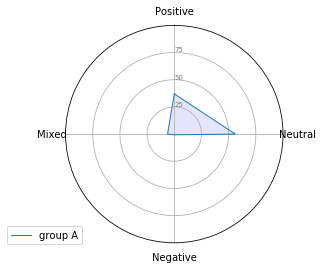

In [74]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 
# Set data
"""
df = pd.DataFrame({
'group': ['A','B','C','D'],
'var1': [38, 1.5, 30, 4],
'var2': [29, 10, 9, 34],
'var3': [8, 39, 23, 24],
'var4': [7, 31, 33, 14],
'var5': [28, 15, 32, 14]
})
"""
df = pd.DataFrame({
    'group': ['MLK'],
    'Positive': [0.36963951587677],
    'Neutral': [0.5614382028579712],
    'Negative': [0.006769296247512102],
    'Mixed':[0.06215296685695648]})
#""" 
 
# ------- PART 1: Create background
 
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0.25,0.5,0.75], ["25","50","75"], color="grey", size=7)
plt.ylim(0,1)
 
 
# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group A")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
#values=df.loc[1].drop('group').values.flatten().tolist()
#values += values[:1]
#ax.plot(angles, values, linewidth=1, linestyle='solid', label="group B")
#ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))


In [69]:
categories

['var1', 'var2', 'var3', 'var4', 'var5']

Bibliografia e Links
* Tutorial de reconhecimento de audio em Python https://realpython.com/python-speech-recognition/
* Tutorial de como baixar videos do Youtube usando linha de comando no Linux https://itsfoss.com/download-youtube-linux/
* Projeto Youtube-DL https://github.com/ytdl-org/youtube-dl/blob/master/README.md#readme
* Discurso “We Shall Fight on the Beaches” de Winston Churchill https://www.artofmanliness.com/we-shall-fight-on-the-beaches-by-winston-churchill/
* Discurso “40th Anniversary of D-Day” de Ronald Regan https://www.artofmanliness.com/40th-anniversary-of-d-day-by-ronald-regan/ https://www.youtube.com/watch?v=eEIqdcHbc8I
* Discurso "I Have a Dream" de Martin Luther King https://kinginstitute.stanford.edu/king-papers/documents/i-have-dream-address-delivered-march-washington-jobs-and-freedom
* Discurso “What Matters More Than Your Talents” de Jeff Bezos https://jamesclear.com/great-speeches/what-matters-more-than-your-talents-by-jeff-bezos
* Discurso “Make Good Art” de Neil Gaiman https://jamesclear.com/great-speeches/make-good-art-by-neil-gaiman
* Tutorial de configuração de conta AWS e boto3 https://boto3.amazonaws.com/v1/documentation/api/latest/guide/quickstart.html#using-boto-3
* Tutorial de como lidar com Json no Python https://realpython.com/python-json/
* Curso de 'Natural Language Processing Fundamentals in Python' do DataCamp https://www.datacamp.com/courses/natural-language-processing-fundamentals-in-python